In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import (accuracy_score, 
                             precision_score,
                             recall_score, 
                             f1_score)
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [4]:
dataset = pd.read_csv('mock_nrb_data_20230505-1683304584197.csv')
dataset.shape

(27469, 8)

# Exploratory Data Analysis

In [5]:
dataset.head()

,TICKET_NUM,PROBLEM_TYPE,RESOLUTION_TYPE,OEM_NAME,NRB_ASSIGNED_DATE,RESOLVED_DATE,IQT_NRB_DETERMINED,ATTRIBUTES
0,NRB000011100070,Signal Issue Data-No Signal Where Previously P...,NETWORK - TRANSPORT - FACILITIES/CIRCUITS,ODI-Samsung,2023-04-01 00:27:47.000,2023-04-02 12:58:50.000,4.603611,"5G,5G Mobile,SP,5G Mobile Consumer"
1,NRB000011100071,Signal Issue Data-No Signal Where Previously P...,NETWORK - TRANSPORT - FACILITIES/CIRCUITS,Apple,2023-04-01 00:34:29.000,2023-04-02 13:23:41.000,4.614167,"5G,5G Mobile,SP,5G Mobile Consumer"
2,NRB000011100072,Signal Issue Voice-No Signal Where Previously ...,NETWORK - TRANSPORT - FACILITIES/CIRCUITS,Apple,2023-04-01 00:39:44.000,2023-04-02 12:11:50.000,4.429167,"5G,5G Mobile,SP,VoLTE,5G Mobile Consumer"
3,NRB000011100073,Broadband/National Access-Performance-Slow Speeds,611 ACTION - DEVICE,Askey,2023-04-01 00:40:17.000,2023-05-01 04:52:51.000,0.366111,"5G,5G Fixed,5G Fixed Consumer,Broadband,DATA,5..."
4,NRB000011100074,Signal Issue Data-No Signal Where Previously P...,611 ACTION - COVERAGE - OPPORTUNITY,ODI-Agsense,2023-04-01 00:48:24.000,2023-04-02 05:40:49.000,0.000000,SP


In [6]:
dataset.describe()

,IQT_NRB_DETERMINED
count,27469.000000
mean,48.150437
std,133.499422
min,0.000000
25%,0.000000
50%,0.162778
75%,15.448611
max,789.366389


In [7]:
# Dropping off irrelevant column
df_temp = dataset.drop(dataset.columns[0], axis=1)
df_temp.head()

,PROBLEM_TYPE,RESOLUTION_TYPE,OEM_NAME,NRB_ASSIGNED_DATE,RESOLVED_DATE,IQT_NRB_DETERMINED,ATTRIBUTES
0,Signal Issue Data-No Signal Where Previously P...,NETWORK - TRANSPORT - FACILITIES/CIRCUITS,ODI-Samsung,2023-04-01 00:27:47.000,2023-04-02 12:58:50.000,4.603611,"5G,5G Mobile,SP,5G Mobile Consumer"
1,Signal Issue Data-No Signal Where Previously P...,NETWORK - TRANSPORT - FACILITIES/CIRCUITS,Apple,2023-04-01 00:34:29.000,2023-04-02 13:23:41.000,4.614167,"5G,5G Mobile,SP,5G Mobile Consumer"
2,Signal Issue Voice-No Signal Where Previously ...,NETWORK - TRANSPORT - FACILITIES/CIRCUITS,Apple,2023-04-01 00:39:44.000,2023-04-02 12:11:50.000,4.429167,"5G,5G Mobile,SP,VoLTE,5G Mobile Consumer"
3,Broadband/National Access-Performance-Slow Speeds,611 ACTION - DEVICE,Askey,2023-04-01 00:40:17.000,2023-05-01 04:52:51.000,0.366111,"5G,5G Fixed,5G Fixed Consumer,Broadband,DATA,5..."
4,Signal Issue Data-No Signal Where Previously P...,611 ACTION - COVERAGE - OPPORTUNITY,ODI-Agsense,2023-04-01 00:48:24.000,2023-04-02 05:40:49.000,0.000000,SP


In [8]:
# To get all data types
df_temp.dtypes.sort_values()

IQT_NRB_DETERMINED    float64
PROBLEM_TYPE           object
RESOLUTION_TYPE        object
OEM_NAME               object
NRB_ASSIGNED_DATE      object
RESOLVED_DATE          object
ATTRIBUTES             object
dtype: object

In [9]:
# To know missing values
df_temp.isna().sum()

PROBLEM_TYPE             0
RESOLUTION_TYPE       8684
OEM_NAME              1593
NRB_ASSIGNED_DATE        0
RESOLVED_DATE         8727
IQT_NRB_DETERMINED       0
ATTRIBUTES               0
dtype: int64

In [10]:
# Query 1. Given the mock ticket data, please analyze and visualize any patterns or trends that stand out.

# There might be correlation among Problem, Attributes, Device Manufacturer
# For each manufacturer - how many types of distinct problems are there?

# We need only following columns to find the correlation among them
# RESOLUTION_TYPE, NRB_ASSIGNED_DATE, RESOLVED_DATE, IQT_NRB_DETERMINED

df_temp_model = df_temp.drop(df_temp.columns[[1,3,4,5]], axis=1)
df_temp_model.head()

,PROBLEM_TYPE,OEM_NAME,ATTRIBUTES
0,Signal Issue Data-No Signal Where Previously P...,ODI-Samsung,"5G,5G Mobile,SP,5G Mobile Consumer"
1,Signal Issue Data-No Signal Where Previously P...,Apple,"5G,5G Mobile,SP,5G Mobile Consumer"
2,Signal Issue Voice-No Signal Where Previously ...,Apple,"5G,5G Mobile,SP,VoLTE,5G Mobile Consumer"
3,Broadband/National Access-Performance-Slow Speeds,Askey,"5G,5G Fixed,5G Fixed Consumer,Broadband,DATA,5..."
4,Signal Issue Data-No Signal Where Previously P...,ODI-Agsense,SP


In [11]:
# Remove all rows whose OEM_NAME column has Null values

# To know missing values
df_temp_model.isna().sum()

PROBLEM_TYPE       0
OEM_NAME        1593
ATTRIBUTES         0
dtype: int64

In [12]:
df_temp_model_1 = df_temp_model.dropna()
df_temp_model_1.shape

(25876, 3)

In [13]:
# To know missing values
df_temp_model_1.isna().sum()

PROBLEM_TYPE    0
OEM_NAME        0
ATTRIBUTES      0
dtype: int64

In [14]:
# To store label to map with the encoded value after labelencoder
label = {}
for column  in ['PROBLEM_TYPE', 'OEM_NAME', 'ATTRIBUTES']:
    label[column] = dict()

In [15]:
# Convertion from categorical columns to numerical columns

categorical_columns = ['PROBLEM_TYPE', 'OEM_NAME', 'ATTRIBUTES']
df_temp_model_11 = pd.DataFrame(columns=['PROBLEM_TYPE', 'OEM_NAME', 'ATTRIBUTES'])
for column in categorical_columns:
    df_temp_model_11[column], label[column] = pd.factorize(df_temp_model_1[column])

df_temp_model_11.head()

,PROBLEM_TYPE,OEM_NAME,ATTRIBUTES
0,0,0,0
1,0,1,0
2,1,1,1
3,2,2,2
4,0,3,3


In [16]:
xticks_label = [list(), list(), list()]#problem_type,OEM_NAME, Attributes actual values
x_values_label = [list(), list(), list()]#encoded values

for i,column in enumerate(categorical_columns,0):
    for j in range(len(label[column])):
        xticks_label[i].append(label[column][j])
        x_values_label[i].append(j)

<function matplotlib.pyplot.show(close=None, block=None)>

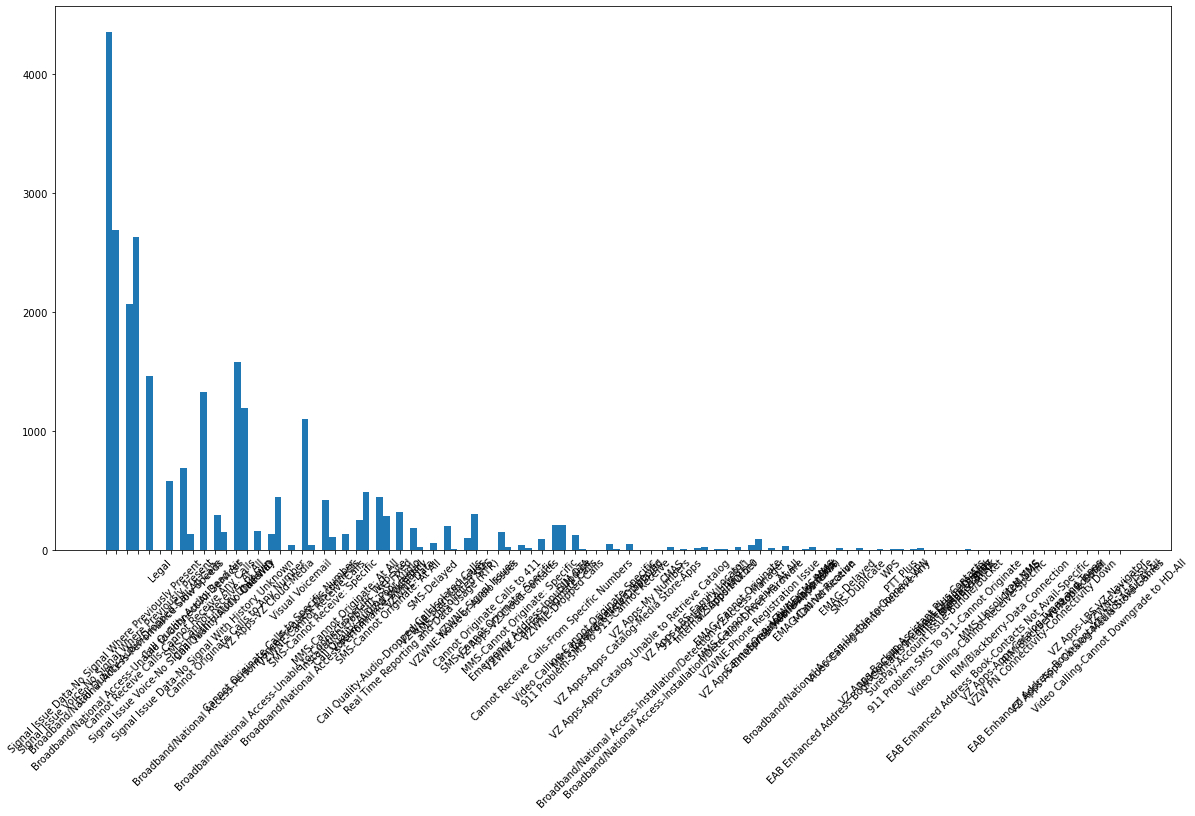

In [17]:
# PROBLEM_TYPE distribution graph

plt.figure(figsize=(20,10))
plt.hist(list(df_temp_model_11['PROBLEM_TYPE']), bins = 150)
plt.xticks(x_values_label[0], xticks_label[0], rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

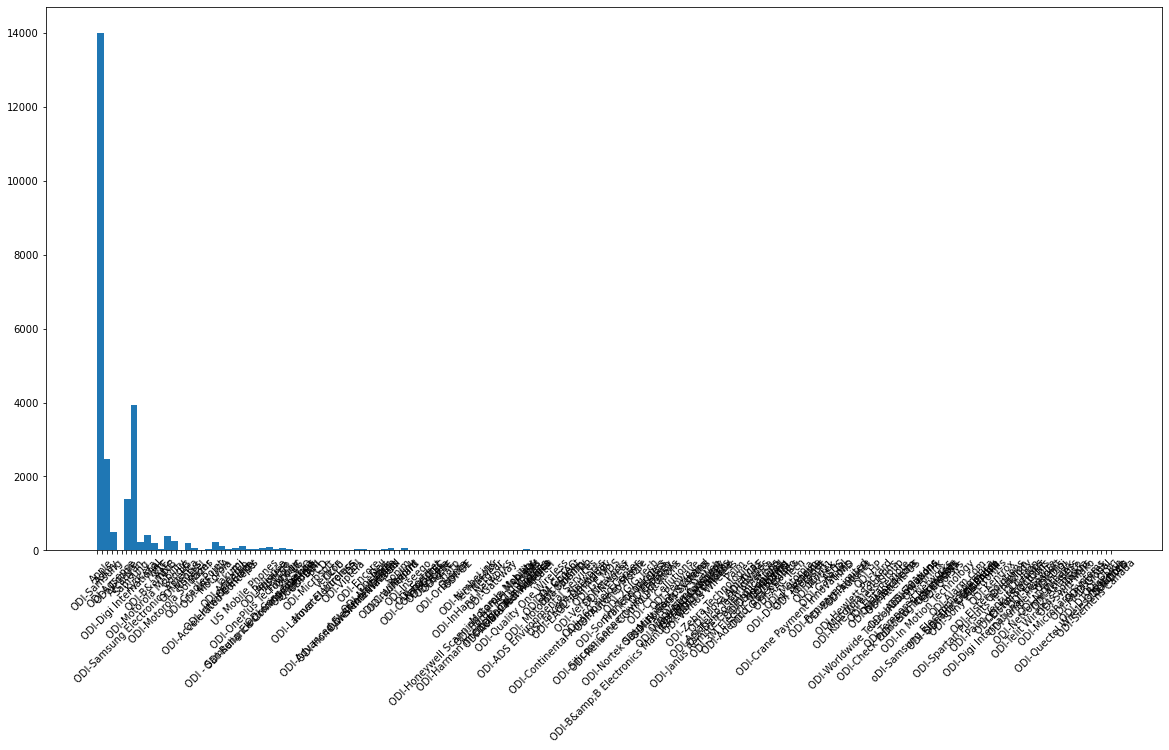

In [18]:
# OEM_NAME distribution graph

plt.figure(figsize=(20,10))
plt.hist(list(df_temp_model_11['OEM_NAME']), bins = 150)
plt.xticks(x_values_label[1], xticks_label[1], rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

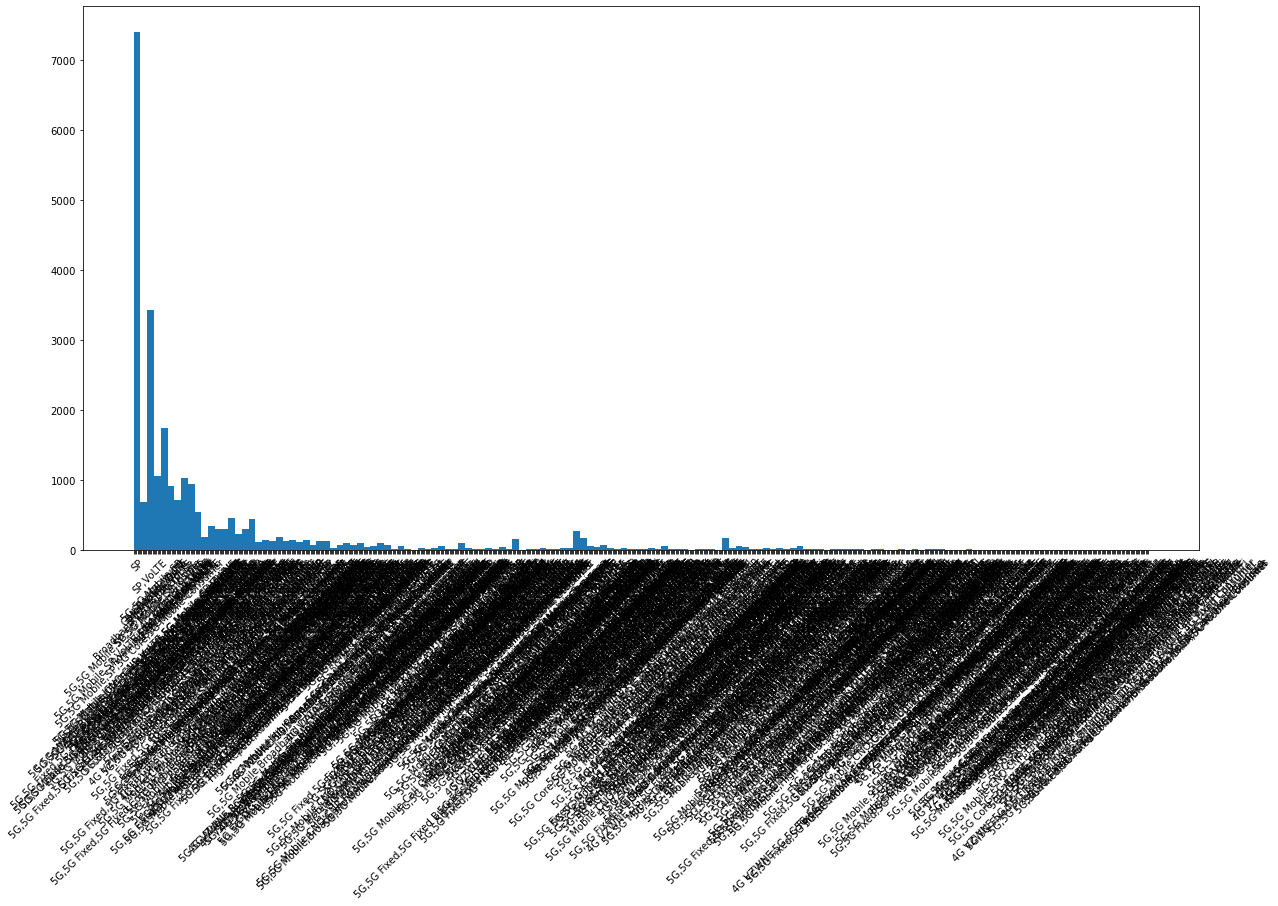

In [26]:
# ATTRIBUTES distribution graph

plt.figure(figsize=(20,10))
plt.hist(list(df_temp_model_11['ATTRIBUTES']), bins = 150)
plt.xticks(x_values_label[2], xticks_label[2], rotation=45)
plt.show

<AxesSubplot:>

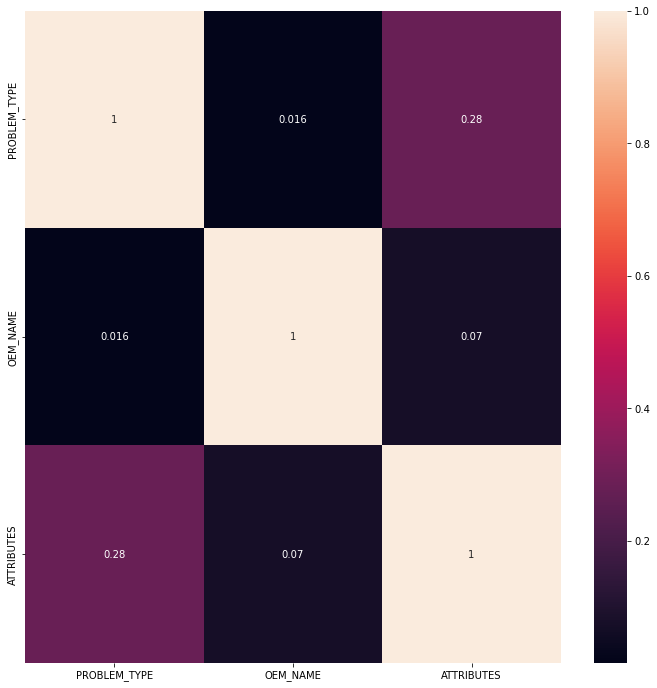

In [27]:
#creating a heat map to see the degree of correlation visually
plt.figure(figsize=(12, 12))
vg_corr = df_temp_model_11.corr()
sns.heatmap(vg_corr, xticklabels = vg_corr.columns.values,yticklabels = vg_corr.columns.values, annot = True)

In [28]:
# Problem Type and Attributes are more correlated than OEM_NAME, whose correlation coefficient is 0.07

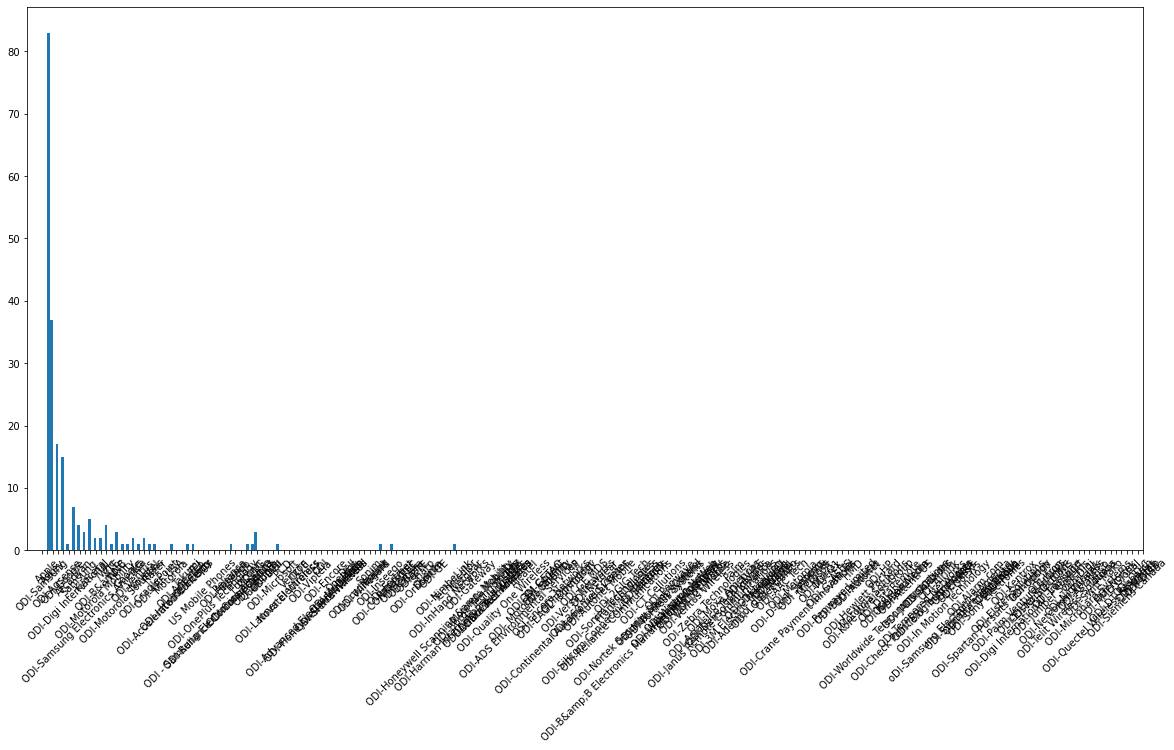

In [29]:
# For each manufacturer - how many types of distinct problems are there?
df_temp_model_2 =  df_temp_model_11.drop(df_temp_model_11.columns[2], axis=1)

df = df_temp_model_2.groupby('OEM_NAME')['PROBLEM_TYPE'].nunique()

# plot the result
plt.figure(figsize=(20,10))
plt.hist(df, bins = 150)
#print(df)
#df.unstack().plot()
plt.xticks(x_values_label[1], xticks_label[1], rotation=45)
plt.show()

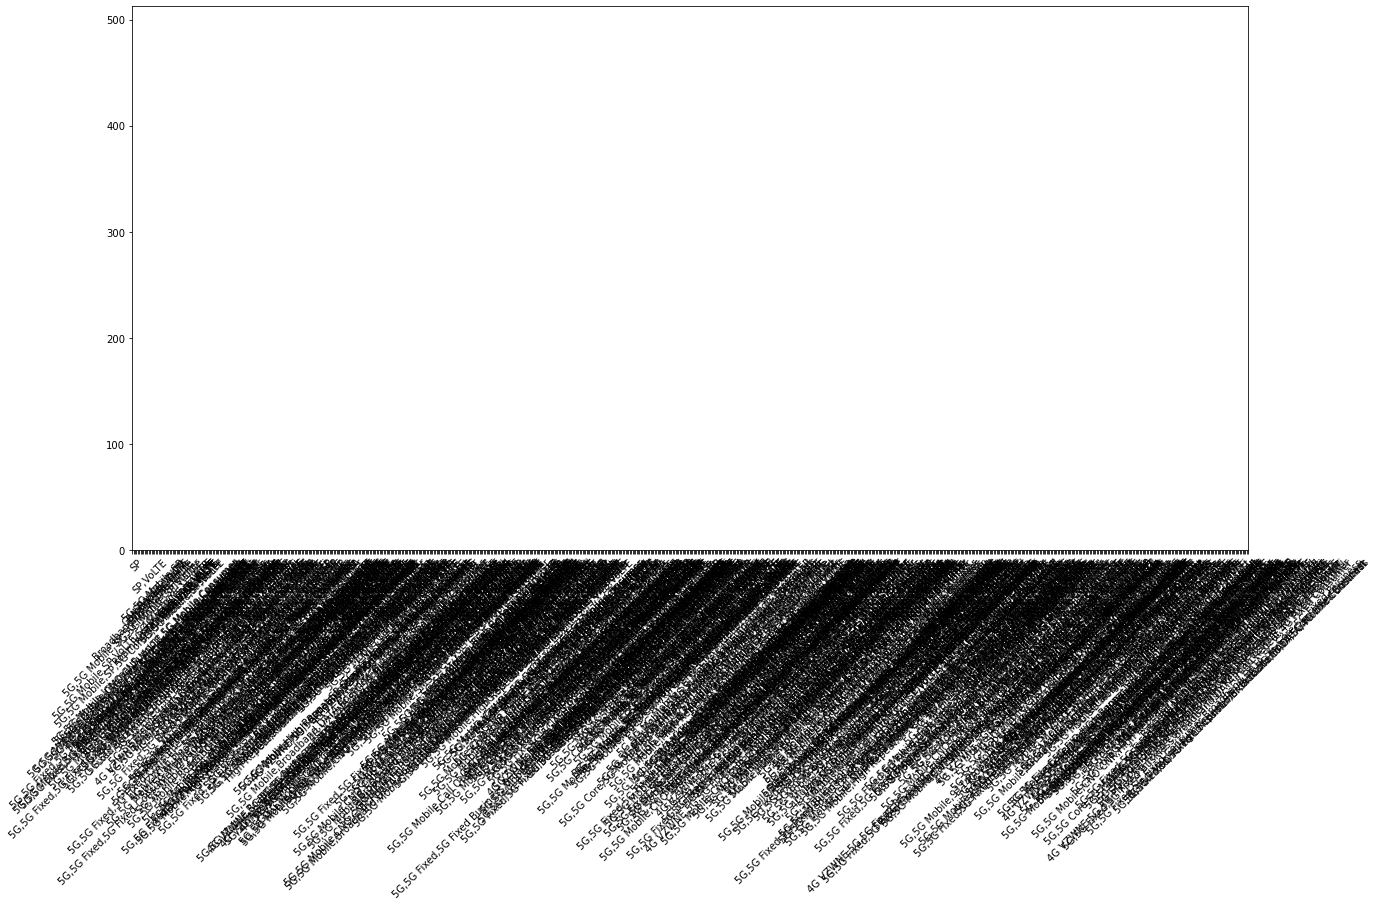

In [30]:
# For each Attributes - how many types of distinct problems are there?
df_temp_model_3 =  df_temp_model_1.drop(df_temp_model_1.columns[1], axis=1)

df_3 = df_temp_model_3.groupby('ATTRIBUTES')['PROBLEM_TYPE'].nunique()

# plot the result
plt.figure(figsize=(20,10))
plt.hist(df_3, bins = 150)
plt.xticks(x_values_label[2], xticks_label[2], rotation=45)
plt.show()

In [32]:
df_3

ATTRIBUTES
4G Fixed Consumer,5G,5G Fixed,Broadband,DATA                                  3
4G Fixed Consumer,5G,5G Fixed,SP                                              2
4G Fixed Consumer,5G,5G Mobile,Broadband,DATA                                 1
4G VZWNE,5G,5G Core,5G Mobile,5G Mobile Consumer,VZWNE                        1
4G VZWNE,5G,5G Fixed,5G Fixed Business,High Repeat,VZWNE,5G Fixed Business    1
                                                                             ..
Voicemail,VoLTE,Wholesale                                                     1
Voicemail,VoLTE,Wholesale,Charter                                             1
Voicemail,VoLTE,Wholesale,Comcast                                             1
Voicemail,VoWiFi                                                              1
WPS                                                                           1
Name: PROBLEM_TYPE, Length: 804, dtype: int64

In [33]:
# We can build a model using Problem Type and Attributes columns by splitting the attributes into multiple columns

df_4 = dataset[dataset.columns[7]].str.split(',', expand=True)
df_4.head()

,0,1,2,3,4,5,6,7,8
0,5G,5G Mobile,SP,5G Mobile Consumer,None,None,None,None,None
1,5G,5G Mobile,SP,5G Mobile Consumer,None,None,None,None,None
2,5G,5G Mobile,SP,VoLTE,5G Mobile Consumer,None,None,None,None
3,5G,5G Fixed,5G Fixed Consumer,Broadband,DATA,5G Fixed Consumer,None,None,None
4,SP,None,None,None,None,None,None,None,None


In [34]:
new_df = pd.concat([dataset[dataset.columns[1]], df_4],axis=1, ignore_index=True, sort=False)

In [35]:
new_df.head()

,0,1,2,3,4,5,6,7,8,9
0,Signal Issue Data-No Signal Where Previously P...,5G,5G Mobile,SP,5G Mobile Consumer,None,None,None,None,None
1,Signal Issue Data-No Signal Where Previously P...,5G,5G Mobile,SP,5G Mobile Consumer,None,None,None,None,None
2,Signal Issue Voice-No Signal Where Previously ...,5G,5G Mobile,SP,VoLTE,5G Mobile Consumer,None,None,None,None
3,Broadband/National Access-Performance-Slow Speeds,5G,5G Fixed,5G Fixed Consumer,Broadband,DATA,5G Fixed Consumer,None,None,None
4,Signal Issue Data-No Signal Where Previously P...,SP,None,None,None,None,None,None,None,None


In [36]:
new_df.isna().sum()

0        0
1        0
2     2437
3     6968
4     8447
5    12710
6    21007
7    25876
8    27350
9    27468
dtype: int64

In [37]:
# Drop columns [6, 7, 8, 9] as they have more null values
df_temp_model_4 =  new_df.drop(new_df.columns[[6,7,8,9]], axis=1)

# Impute all null with mode value
l=df_temp_model_4.filter([2, 3, 4, 5]).mode()
df_temp_model_4[[2, 3, 4, 5]]=df_temp_model_4[[2, 3, 4, 5]].fillna(value=l.iloc[0])
df_temp_model_4.head()

,0,1,2,3,4,5
0,Signal Issue Data-No Signal Where Previously P...,5G,5G Mobile,SP,5G Mobile Consumer,5G Mobile Consumer
1,Signal Issue Data-No Signal Where Previously P...,5G,5G Mobile,SP,5G Mobile Consumer,5G Mobile Consumer
2,Signal Issue Voice-No Signal Where Previously ...,5G,5G Mobile,SP,VoLTE,5G Mobile Consumer
3,Broadband/National Access-Performance-Slow Speeds,5G,5G Fixed,5G Fixed Consumer,Broadband,DATA
4,Signal Issue Data-No Signal Where Previously P...,SP,5G Mobile,SP,VoLTE,5G Mobile Consumer


In [38]:
df_temp_model_4.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

In [39]:
# To store label to map with the encoded value after labelencoder
label_2 = {}
for column  in [0, 1, 2, 3, 4, 5]:
    label_2[column] = dict()

In [40]:
# Convertion from categorical columns to numerical columns
categorical_columns = [0, 1, 2, 3, 4, 5]
df_temp_model_5 = pd.DataFrame(columns = [0, 1, 2, 3, 4, 5])        
for column in categorical_columns:
    df_temp_model_5[column], label_2[column] = pd.factorize(df_temp_model_4[column])

df_temp_model_5.head()

,0,1,2,3,4,5
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,1,0,0,0,1,0
3,2,0,1,1,2,1
4,0,1,0,0,1,0


In [41]:
xticks_label_2 = [list(), list(), list(), list(), list(), list()]
x_values_label_2 = [list(), list(), list(), list(), list(), list()]

for i,column in enumerate(categorical_columns,0):
    for j in range(len(label_2[column])):
        xticks_label_2[i].append(label_2[column][j])
        x_values_label_2[i].append(j)

# Split data into Train and Test

In [42]:
X = df_temp_model_5.iloc[:, 1:6]#independent variables/predictors
y = df_temp_model_5.iloc[:, 0]#dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)#X_train,y_train for model & X_test for testing the model, y_test for getting accuracy & metric score of the model

# Fit a model - Random Forest

In [43]:
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf_model = rf.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Fit a model - Naive Bayes

In [44]:
gnb = GaussianNB()
gnb_model = gnb.fit(X_train, y_train)
gnb_predictions = gnb_model.predict(X_test)

# Fit a model - Decision Tree

In [45]:
dt = DecisionTreeClassifier(random_state=0)
dt_model = dt.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Evaluate models

In [46]:
# Random Forest
accuracy_score = metrics.accuracy_score(y_test,rf_predictions)
precision_score = metrics.precision_score(y_test, rf_predictions, average='macro')
recall_score = metrics.recall_score(y_test,rf_predictions, average='micro')
f1_score = metrics.f1_score(y_test,rf_predictions, average='weighted')

C:\Users\rajsa\Divya Python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
print("For Random Forest, following are performance metrics:")
print("accuracy_score : %f" %(accuracy_score))
print("precision_score : %f" %(precision_score))
print("recall_score : %f" %(recall_score))
print("F1 Score : %f" %(f1_score))

For Random Forest, following are performance metrics:
accuracy_score : 0.264834
precision_score : 0.012308
recall_score : 0.264834
F1 Score : 0.153096


In [48]:
# Naive Bayes
accuracy_score = metrics.accuracy_score(y_test,gnb_predictions)
precision_score = metrics.precision_score(y_test, gnb_predictions, average='macro')
recall_score = metrics.recall_score(y_test,gnb_predictions, average='micro')
f1_score = metrics.f1_score(y_test,gnb_predictions, average='weighted')

C:\Users\rajsa\Divya Python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
print("For Naive Bayes, following are performance metrics:")
print("accuracy_score : %f" %(accuracy_score))
print("precision_score : %f" %(precision_score))
print("recall_score : %f" %(recall_score))
print("F1 Score : %f" %(f1_score))

For Naive Bayes, following are performance metrics:
accuracy_score : 0.017110
precision_score : 0.029767
recall_score : 0.017110
F1 Score : 0.009785


In [50]:
# Decision Tree
accuracy_score = metrics.accuracy_score(y_test,dt_predictions)
precision_score = metrics.precision_score(y_test, dt_predictions, average='macro')
recall_score = metrics.recall_score(y_test,dt_predictions, average='micro')
f1_score = metrics.f1_score(y_test,dt_predictions, average='weighted')

C:\Users\rajsa\Divya Python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
print("For Decision Tree, following are performance metrics:")
print("accuracy_score : %f" %(accuracy_score))
print("precision_score : %f" %(precision_score))
print("recall_score : %f" %(recall_score))
print("F1 Score : %f" %(f1_score))

For Decision Tree, following are performance metrics:
accuracy_score : 0.570076
precision_score : 0.332292
recall_score : 0.570076
F1 Score : 0.491598


# The Accuracy of Decision Tree model is the best in this scenario